# Predicting Vaccine Uptake Using Behavioral and Background Data

A project by David Mburu

# Business Understanding

As the world struggled to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns could provide guidance for future public health efforts.

To aid KEMRI in administering vaccines to Kenyans effectively in future, I have undertaken this project to determine how the above mentioned qualities influence vaccine uptake. 

Some of the main features focused on in this project are the age group, beliefs, economic conditions and number of people in a household and how these affect vaccination uptake

Some other issues that affect uptake but are not addressed by the project are: misinformation, vaccine shortages, conspiracy theories about vaccines and infrastructure availability.

The primary data source used for the project is from a website named drivendata and is explained in detail in the data understanding section.

There is still opportunity to continue going deeper into the dataset and gain more insights as the competition it is a part of goes on till 2026. However because of limited academic time, this project was limited to 7 days.

Some of the questions this project helps stakeholders to answer are:

1. How does the age group of an individual affect vaccine uptake?

2. How do people's beliefs influence their likelihood of getting vaccinated?

3. How does a person's economic status impact his vaccination chances?

4. How does the number of people in a household affect vaccine uptake?

The above questions hence make up the 4 objectives of this project

# Data Understanding

The [dataset](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/) is sourced from the DrivenData website and is part of an ongoing machine learning competition.

The data is provided courtesy of the United States [National Center for Health Statistics](https://www.cdc.gov/nchs/index.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fnchs%2Findex.htm). The United States government conducted a Survey which helped gather data points that could be used in analysis to figure out the characteristics that mostly affect how people respond to vaccines. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

The dataset is made up of 26707 entries which are distributed across 36 columns representing the people's answers to these survey questions. As a result of how most surveys are done, this dataset is made up of binary values representing 'true' or 'false' and scaled entries representing the degree of the respondents' opinion about a question.

These 36 columns are our features that we will use to build models. They are all categorical features even though there are some numbers in some columns as these don't represent degree of value but respondents' opinions as stated above. The binary columns are encoded as floats. 

There is also a separate file containing 2 columns which are the targets, one for h1n1 vaccine uptake and the other for seasonal flu vaccine uptake. These columns are integer types and have binary data, 0 representing no vaccine uptake and 1 representing vaccine uptake. The h1n1 column is imbalanced hence I only used it for visalizations and analysis but dropped it off during modeling and used the seasonal flu vacccine column to train the models.

# Data Preparation

To prepare data for visualization, I simply dropped all missing values and plotted graphs to gain raw insights from the data.

To prepare data for modeling, I split the process into two:

1. Dropping all nulls and building models

2. Imputing null values then rebuilding the models

Since all the columns are categorical, I imputed missing values using mode.

In addition to this I also converted 'object' columns into 'category' to enhance memory efficiency during modeling.
I also one-hot encoded nominal columns, while ordinal encoded the ordinal columns. The other columns representing binary values I left untouched except when imputing. 

I checked for duplicated entries and found none

After one-hot encoding I dropped the first encoded columns to prevent multicollinearity

After ordinal encoding I scaled the data to prevent some columns from being unfairly punished by the logistic regression model

I also checked the target classes for any imbalance and found h1n1 to be imbalanced while seasonal flu to be evenly balanced. I therefore only used seasonal flu vaccine data for modeling. 
h1n1 data could still be balanced synthetically using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) method from imbalanced learn.

## Exploratory Data Analysis

In [438]:
# import pandas and python function to explore the data
import pandas as pd
import numpy as np
from __init__ import explore_dataset

In [439]:
explore_dataset('Data/training_set_features.csv')

----------------Dataset Overview----------------  

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0       

In [440]:
# Load the features file
train_features = pd.read_csv('Data/training_set_features.csv')
train_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [441]:
# Load the labels file
train_labels = pd.read_csv('Data/training_set_labels.csv')
train_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [442]:
# Join the features and labels into one dataframe
train_df = pd.concat([train_features, train_labels.drop('respondent_id', axis = 1)], axis = 1)
train_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [443]:
# Check for duplicates
train_df.duplicated().sum()

0

In [444]:
# Check for imbalance in the targets

print(f'''
      H1N1: 
      {train_df['h1n1_vaccine'].value_counts()}
      
      seasonal_flu: 
      {train_df['seasonal_vaccine'].value_counts()}
      ''')


      H1N1: 
      0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
      
      seasonal_flu: 
      0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
      


The H1N1 vaccine uptake is imbalanced hence we will only use the columns directly related to h1n1 for our analysis

These columns represent people's beliefs about the vaccine and whether a doctor recommended them to take it

In [445]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [446]:
h1n1_df = train_df[['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine']].copy()
h1n1_df.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,h1n1_vaccine
0,1.0,0.0,0.0,3.0,1.0,2.0,0
1,3.0,2.0,0.0,5.0,4.0,4.0,0
2,1.0,1.0,NaN,3.0,1.0,1.0,0
3,1.0,1.0,0.0,3.0,3.0,5.0,0
4,2.0,1.0,0.0,3.0,3.0,2.0,0


In [447]:
# drop all null rows to make clean visuals
h1n1_df.dropna(inplace = True)

Let's visualize this to see how people's beliefs and background affect vaccine uptake

The scale on the x-axis represents the degree of a person's opinion, the higher the number the stronger the opinion. When binary, 0 represents false while a 1 represents true

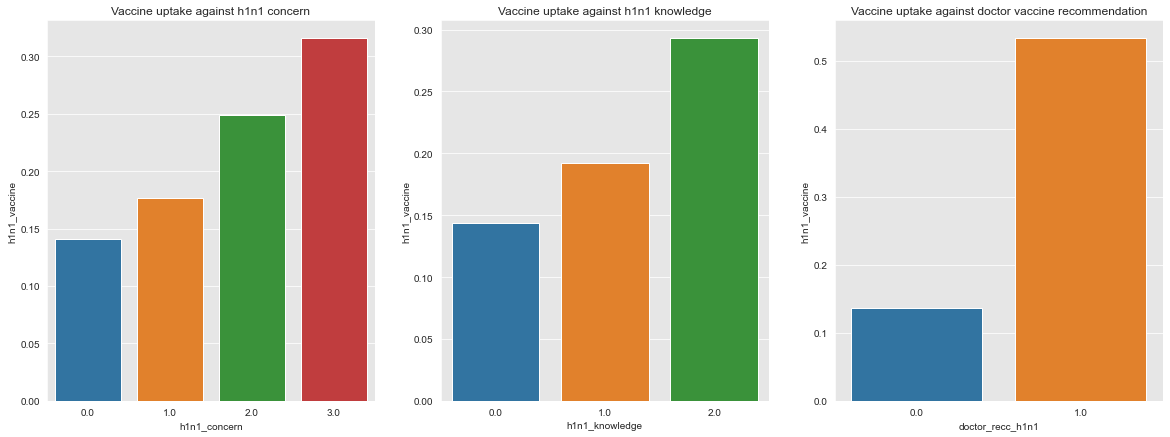

In [448]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

sns.barplot(data = h1n1_df, x = 'h1n1_concern', y = 'h1n1_vaccine', ci = None, ax = axes[0])
axes[0].set_title('Vaccine uptake against h1n1 concern')

sns.barplot(data = h1n1_df, x = 'h1n1_knowledge', y = 'h1n1_vaccine', ci = None, ax = axes[1])
axes[1].set_title('Vaccine uptake against h1n1 knowledge')

sns.barplot(data = h1n1_df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine', ci = None, ax = axes[2])
axes[2].set_title('Vaccine uptake against doctor vaccine recommendation');

As expected, the degree of concern and knowledge about h1n1 influences a person's decision to vaccinate

However, a doctor's recommendation to vaccinate influences this more

Now let's see how people's beliefs affect vaccine uptake

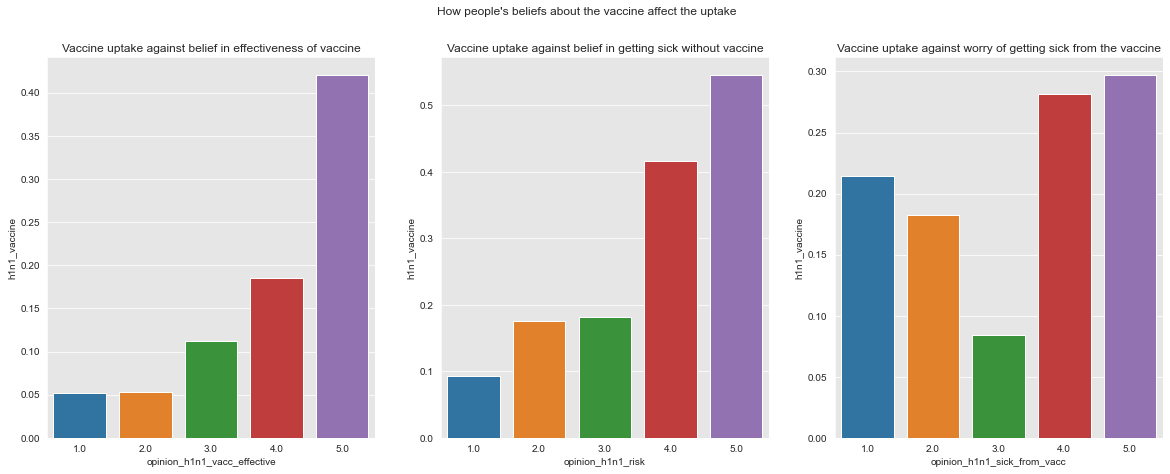

In [449]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))
fig.suptitle('How people\'s beliefs about the vaccine affect the uptake')

sns.barplot(data = h1n1_df, x = 'opinion_h1n1_vacc_effective', y = 'h1n1_vaccine', ci = None, ax = axes[0])
axes[0].set_title('Vaccine uptake against belief in effectiveness of vaccine')

sns.barplot(data = h1n1_df, x = 'opinion_h1n1_risk', y = 'h1n1_vaccine', ci = None, ax = axes[1])
axes[1].set_title('Vaccine uptake against belief in getting sick without vaccine')

sns.barplot(data = h1n1_df, x = 'opinion_h1n1_sick_from_vacc', y = 'h1n1_vaccine', ci = None, ax = axes[2])
axes[2].set_title('Vaccine uptake against worry of getting sick from the vaccine');

People who believe the vaccine is effective are more likely to take it than those who do not

People who believe they will not get sick even without getting vaccinated are less likely to take it

People's worry about the vaccine making them sick has an interesting impact on uptake where those with medium worry are less likely to take while those on the extreme ends are more likely to take the vaccine. This may be because those who are mostly worried about getting sick have already taken the vaccine. Meanwhile those in the middle just don't care enough about the vaccine to worry as they won't take it anyway. Those less worried about the vaccine making them sick go ahead and take the vaccine as normal. Hence the high distribution at both extreme ends and a low distribution in the middle

Since the H1N1 vaccine uptake data does not evenly represent those who took and those who did not we will not use it any further for our exploratory data analysis. We might balance it out with synthetic data when building models later on.

For now we will continue with the seasonal flu vaccine uptake data

In [450]:
# Drop the columns related to H1N1 vaccine uptake
seasonal_flu_df = train_df.drop(columns = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'], axis = 1)
seasonal_flu_df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [451]:
# drop columns with high number of null values
seasonal_flu_df.drop(columns = ['health_insurance', 'employment_industry', 'employment_occupation'], axis = 1, inplace = True)
seasonal_flu_df

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0
26703,26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0
26704,26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,1
26705,26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0


In [452]:
# drop the remaining rows with null values - this is because all of our features are categorical hence we can't impute
seasonal_flu_df.dropna(inplace=True)

In [453]:
seasonal_flu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19766 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19766 non-null  int64  
 1   behavioral_antiviral_meds    19766 non-null  float64
 2   behavioral_avoidance         19766 non-null  float64
 3   behavioral_face_mask         19766 non-null  float64
 4   behavioral_wash_hands        19766 non-null  float64
 5   behavioral_large_gatherings  19766 non-null  float64
 6   behavioral_outside_home      19766 non-null  float64
 7   behavioral_touch_face        19766 non-null  float64
 8   doctor_recc_seasonal         19766 non-null  float64
 9   chronic_med_condition        19766 non-null  float64
 10  child_under_6_months         19766 non-null  float64
 11  health_worker                19766 non-null  float64
 12  opinion_seas_vacc_effective  19766 non-null  float64
 13  opinion_seas_ris

Now let's see how people's behaviour regarding health safety affects their vaccine uptake

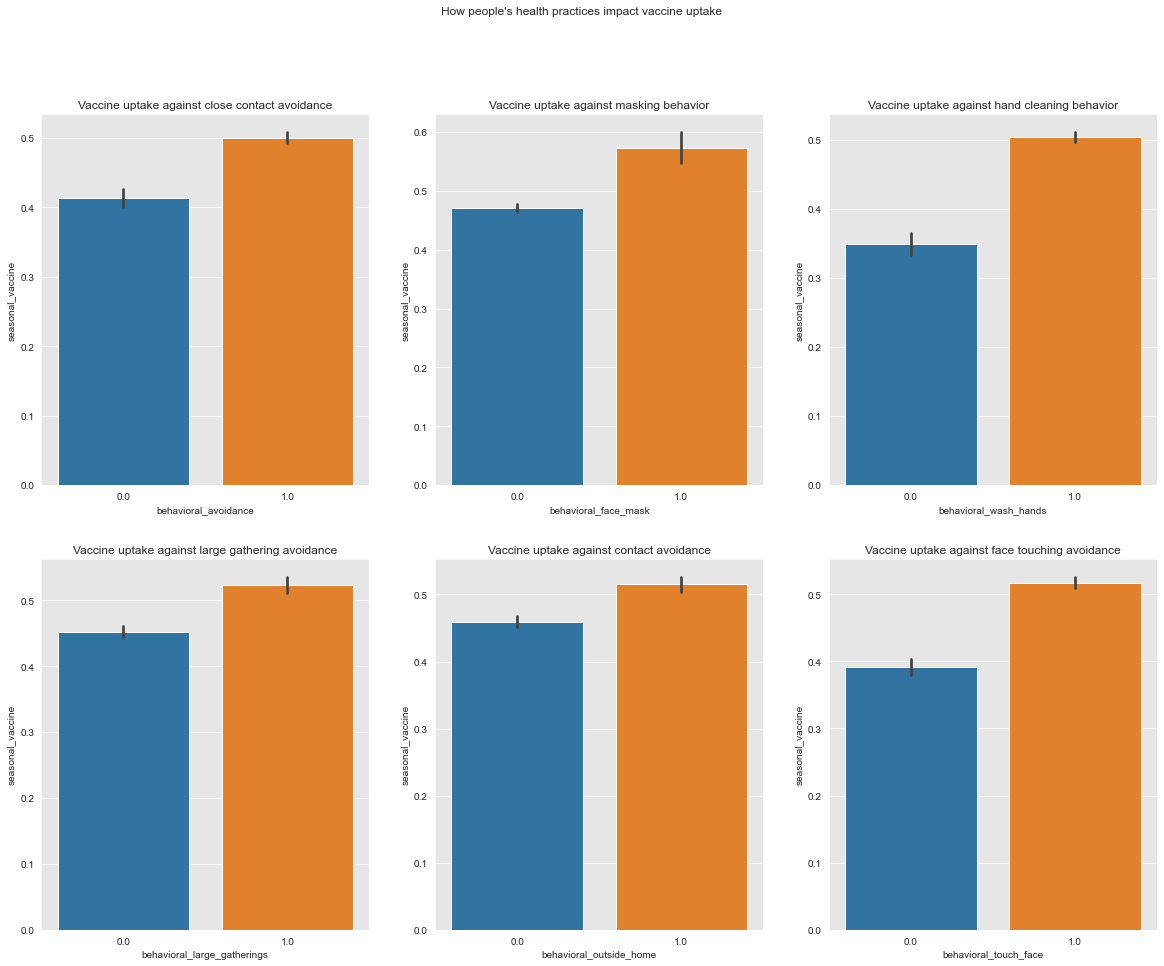

In [454]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))
fig.suptitle('How people\'s health practices impact vaccine uptake')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_avoidance', y = 'seasonal_vaccine', ax = axes[0][0])
axes[0][0].set_title('Vaccine uptake against close contact avoidance')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_face_mask', y = 'seasonal_vaccine', ax = axes[0][1])
axes[0][1].set_title('Vaccine uptake against masking behavior')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_wash_hands', y = 'seasonal_vaccine', ax = axes[0][2])
axes[0][2].set_title('Vaccine uptake against hand cleaning behavior')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_large_gatherings', y = 'seasonal_vaccine', ax = axes[1][0])
axes[1][0].set_title('Vaccine uptake against large gathering avoidance')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_outside_home', y = 'seasonal_vaccine', ax = axes[1][1])
axes[1][1].set_title('Vaccine uptake against contact avoidance')

sns.barplot(data = seasonal_flu_df, x = 'behavioral_touch_face', y = 'seasonal_vaccine', ax = axes[1][2])
axes[1][2].set_title('Vaccine uptake against face touching avoidance');

People who practice health safety measures are more likely to get vaccinated. 

However the difference in vaccination rate is not that high hence these columns might not carry much weight during the modeling process

In addition to the above behavioral columns, there were others like 'marital status' and 'sex' which didn't seem to greatly affect vaccine uptake. Hence I won't show their visualizations here but you can check them out in the [images folder](./Images/).

Below I will only show the visualizations of columns that have a substantial impact on vaccine uptake as well as align with this project's objectives

We'll also assume the opinions about vaccine effectiveness and getting sick affect seasonal flu vaccine uptake the same way as we saw in h1n1. Hence we will not visualize these again but move on to the other remaining columns

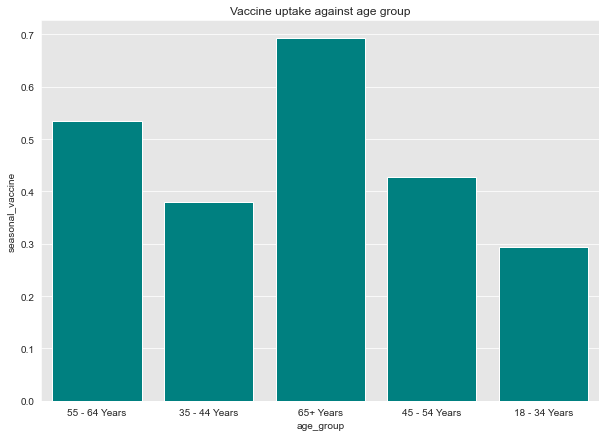

In [455]:
# Show effect of age group on vaccine uptake

plt.figure(figsize = (10, 7))
sns.barplot(data = seasonal_flu_df, x = 'age_group', y = 'seasonal_vaccine', ci = None, saturation=1, color = 'teal')
plt.title('Vaccine uptake against age group');

People below 35 years are least likely to get vaccinated while those above 65 are most likely to go for the vaccine

Let's see how economic status influences vaccine uptake

I will take three columns as indicators of the economic status of a person: 
1. Annual income
2. Employment status
3. Home ownership

Combining these visualizations together, it can show the trend in vaccination uptake against the different economic status indicators

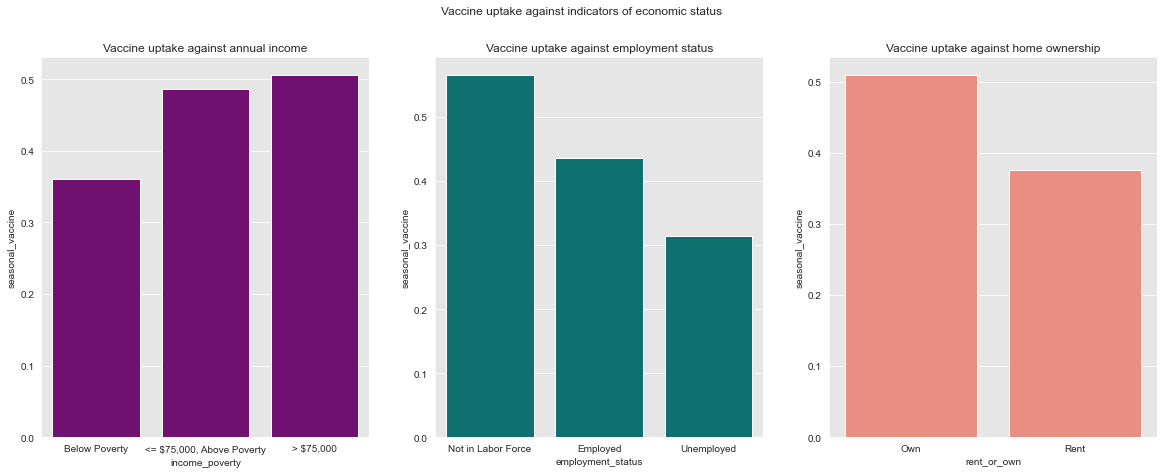

In [456]:
# Show how economic status affects vaccine uptake

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))
fig.suptitle('Vaccine uptake against indicators of economic status')

sns.barplot(data = seasonal_flu_df, x = 'income_poverty', y = 'seasonal_vaccine', ci = None, color = 'Purple', ax = axes[0])
axes[0].set_title('Vaccine uptake against annual income')

sns.barplot(data = seasonal_flu_df, x = 'employment_status', y = 'seasonal_vaccine', ci = None, color = 'Teal', ax = axes[1])
axes[1].set_title('Vaccine uptake against employment status')

sns.barplot(data = seasonal_flu_df, x = 'rent_or_own', y = 'seasonal_vaccine', ci = None, color = 'Salmon', ax = axes[2])
axes[2].set_title('Vaccine uptake against home ownership');

People on the low end of economic status are less likely to get vaccinated than those on the higher end

Next we'll see how the number of people living in a household affects uptake

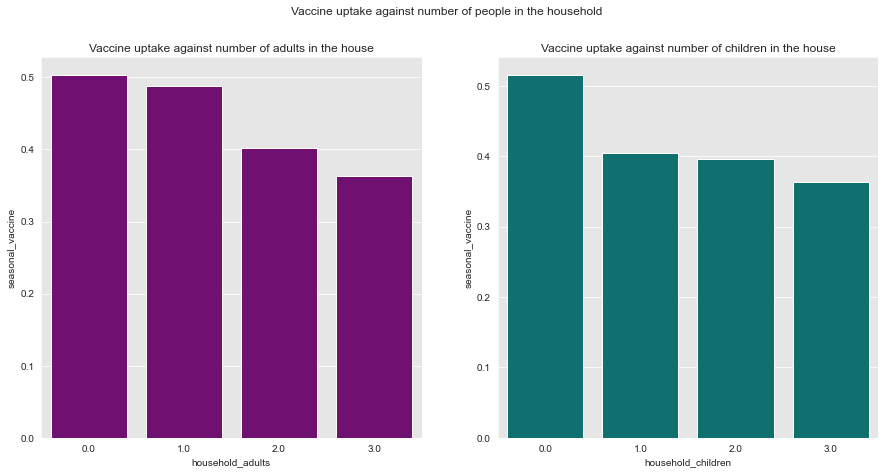

In [457]:
# Visualize how number of people in the household impacts vaccine uptake

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
fig.suptitle('Vaccine uptake against number of people in the household')

sns.barplot(data = seasonal_flu_df, x = 'household_adults', y = 'seasonal_vaccine', ci = None, color = 'Purple', ax = axes[0])
axes[0].set_title('Vaccine uptake against number of adults in the house')

sns.barplot(data = seasonal_flu_df, x = 'household_children', y = 'seasonal_vaccine', ci = None, color = 'Teal', ax = axes[1])
axes[1].set_title('Vaccine uptake against number of children in the house');

Households having more people are less likely to get vaccinated than those with fewer people

# Modeling

I have broken down the modeling steps into two:

1. Using all features in the dataset
2. Using only some select features

The first step is further broken down in two according to data preparation strategies:

a) Dropping all null values from the dataset

b) Imputing the null values

This strategy adds another layer of model tweaking on top of tuning

I will be using the seasonal flu vaccine column as the target for the models to predict. Hence I will drop the features related to h1n1 vaccine

In [458]:
flu_df = train_df.drop(columns = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'], axis = 1)
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

## 1. Using all Dataset Features
### a) Dropping all nulls

In [459]:
flu_df_a = flu_df.dropna().copy()
flu_df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 1 to 26703
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    6469 non-null   float64
 1   behavioral_avoidance         6469 non-null   float64
 2   behavioral_face_mask         6469 non-null   float64
 3   behavioral_wash_hands        6469 non-null   float64
 4   behavioral_large_gatherings  6469 non-null   float64
 5   behavioral_outside_home      6469 non-null   float64
 6   behavioral_touch_face        6469 non-null   float64
 7   doctor_recc_seasonal         6469 non-null   float64
 8   chronic_med_condition        6469 non-null   float64
 9   child_under_6_months         6469 non-null   float64
 10  health_worker                6469 non-null   float64
 11  health_insurance             6469 non-null   float64
 12  opinion_seas_vacc_effective  6469 non-null   float64
 13  opinion_seas_risk

In [460]:
# Import the libraries for data preparation

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [461]:
# All the predictors are categorical, so there is need to encode them. However, they are of two types: ordinal and nominal. For ordinal features, I will use OrdinalEncoder, and for nominal features, OneHotEncoder.
# The nominal features also have a subcategory of features that are binary, which do not need to be one-hot encoded, so I will leave them as-is.
# I will first convert the ordinal colums from float type into category type so I can encode them.
# The nominal features are already of the correct type, but I will also convert them into category type for efficient memory usage during scaling and encoding.


# Identify ordinal and nominal non-binary features to encode
ordinal_features = ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
nominal_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']

In [462]:
# convert the ordinal features to category type
for col in ordinal_features:
    flu_df_a[col] = flu_df_a[col].astype('category')

In [463]:
# convert the nominal features to category type
for col in nominal_features:
    flu_df_a[col] = flu_df_a[col].astype('category')

In [464]:
flu_df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 1 to 26703
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   behavioral_antiviral_meds    6469 non-null   float64 
 1   behavioral_avoidance         6469 non-null   float64 
 2   behavioral_face_mask         6469 non-null   float64 
 3   behavioral_wash_hands        6469 non-null   float64 
 4   behavioral_large_gatherings  6469 non-null   float64 
 5   behavioral_outside_home      6469 non-null   float64 
 6   behavioral_touch_face        6469 non-null   float64 
 7   doctor_recc_seasonal         6469 non-null   float64 
 8   chronic_med_condition        6469 non-null   float64 
 9   child_under_6_months         6469 non-null   float64 
 10  health_worker                6469 non-null   float64 
 11  health_insurance             6469 non-null   float64 
 12  opinion_seas_vacc_effective  6469 non-null   category
 13  op

In [465]:
# split the data into train sets and test sets

X = flu_df_a.drop(columns = ['seasonal_vaccine'], axis = 1)
y = flu_df_a['seasonal_vaccine']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train_a = X_train_a.copy()
X_test_a = X_test_a.copy()

In [466]:
#ordinal encode the ordinal features

oe = OrdinalEncoder()

X_train_a.loc[:, ordinal_features] = oe.fit_transform(X_train_a[ordinal_features])
X_test_a.loc[:, ordinal_features] = oe.transform(X_test_a[ordinal_features])

In [467]:
# scale the transformed ordinal features

scaler = StandardScaler()
X_train_a[ordinal_features] = scaler.fit_transform(X_train_a[ordinal_features])
X_test_a[ordinal_features] = scaler.transform(X_test_a[ordinal_features])

In [468]:
# one-hot encode the non-binary nominal features

ohe = OneHotEncoder(sparse =False, drop = 'first')
X_train_ohe = ohe.fit_transform(X_train_a[nominal_features])
X_test_ohe = ohe.transform(X_test_a[nominal_features])

In [469]:
encoded_train_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(nominal_features), index = X_train_a.index)
encoded_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(nominal_features), index = X_test_a.index)

X_train_a_preprocessed = X_train_a.drop(columns=nominal_features).join(encoded_train_df)
X_test_a_preprocessed = X_test_a.drop(columns=nominal_features).join(encoded_test_df)

In [470]:
# Import sklearn classes for modeling and evaluation of the models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

#### Logistic Regression

In [471]:
# Build a baseline logistic regression model

vanilla_logr_a =LogisticRegression(solver = 'liblinear')

vanilla_logr_a.fit(X_train_a_preprocessed, y_train_a)

vanilla_y_train_pred_a =  vanilla_logr_a.predict(X_train_a_preprocessed)
vanilla_y_pred_a = vanilla_logr_a.predict(X_test_a_preprocessed)

In [472]:
print(f'''
      Train Accuracy: {accuracy_score(y_train_a, vanilla_y_train_pred_a)}
      Test Accuracy: {accuracy_score(y_test_a, vanilla_y_pred_a)}''')

print("\nClassification Report:\n", classification_report(y_test_a, vanilla_y_pred_a))


      Train Accuracy: 0.8015458937198068
      Test Accuracy: 0.8052550231839258

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       702
           1       0.80      0.76      0.78       592

    accuracy                           0.81      1294
   macro avg       0.81      0.80      0.80      1294
weighted avg       0.81      0.81      0.80      1294



In [473]:
# start tuning the model

logr_a =LogisticRegression(fit_intercept = False, C = 1e15, solver = 'liblinear')

logr_a.fit(X_train_a_preprocessed, y_train_a)

y_pred_a = logr_a.predict(X_test_a_preprocessed)
y_train_pred_a = logr_a.predict(X_train_a_preprocessed)

In [474]:
print(f'''
      Train Accuracy: {accuracy_score(y_train_a, y_train_pred_a)}
      Test Accuracy: {accuracy_score(y_test_a, y_pred_a)}''')
print("\nClassification Report:\n", classification_report(y_test_a, y_pred_a))


      Train Accuracy: 0.7990338164251207
      Test Accuracy: 0.7936630602782071

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       702
           1       0.79      0.75      0.77       592

    accuracy                           0.79      1294
   macro avg       0.79      0.79      0.79      1294
weighted avg       0.79      0.79      0.79      1294



In [475]:
# Tune the major hyperparameters to get the best version of the model

logr_a_tuned = LogisticRegression(solver='liblinear')  # liblinear supports L1 and L2 penalties

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],       # regularization types
    'C': [0.01, 0.1, 1, 10, 100]   # inverse of regularization strength
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logr_a_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_a_preprocessed, y_train_a)

# Get the best parameters and estimator
print("Best parameters:", grid_search.best_params_)
best_logr_a = grid_search.best_estimator_

# Predict
y_train_pred_tuned = best_logr_a.predict(X_train_a_preprocessed)
y_pred_tuned = best_logr_a.predict(X_test_a_preprocessed)


Best parameters: {'C': 10, 'penalty': 'l2'}


In [476]:
# evaluating the model

print(f'''
      Train Accuracy: {accuracy_score(y_train_a, y_train_pred_tuned)}
      Test Accuracy: {accuracy_score(y_test_a, y_pred_tuned)}''')
print("\nClassification Report:\n", classification_report(y_test_a, y_pred_tuned))


      Train Accuracy: 0.8013526570048309
      Test Accuracy: 0.8060278207109737

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       702
           1       0.80      0.77      0.78       592

    accuracy                           0.81      1294
   macro avg       0.81      0.80      0.80      1294
weighted avg       0.81      0.81      0.81      1294



#### Decision Tree

In [477]:
# Build a baseline tree model

vanilla_dt = DecisionTreeClassifier(random_state = 42)

vanilla_dt.fit(X_train_a_preprocessed, y_train_a)

vanilla_tree_y_train_pred_a = vanilla_dt.predict(X_train_a_preprocessed)
vanilla_tree_y_pred_a = vanilla_dt.predict(X_test_a_preprocessed)

In [478]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_a, vanilla_tree_y_pred_a)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'''
      Train Accuracy: {accuracy_score(y_train_a, vanilla_tree_y_train_pred_a)}
      Test Accuracy: {accuracy_score(y_test_a, vanilla_tree_y_pred_a)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_a, vanilla_tree_y_pred_a))


      Train Accuracy: 1.0
      Test Accuracy: 0.7163833075734157
      
      AUC: 0.7149144336644336
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       702
           1       0.69      0.70      0.69       592

    accuracy                           0.72      1294
   macro avg       0.71      0.71      0.71      1294
weighted avg       0.72      0.72      0.72      1294



The vanilla tree model is overfitting the training data. This is an expected problem with decision trees because they are prone to overfitting.

Let's try to fix this by regrowing the tree using entropy criterion

In [479]:
entropy_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

entropy_dt.fit(X_train_a_preprocessed, y_train_a)

entropy_tree_y_train_pred_a = entropy_dt.predict(X_train_a_preprocessed)
entropy_tree_y_pred_a = entropy_dt.predict(X_test_a_preprocessed)

In [480]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_a, entropy_tree_y_pred_a)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'''
      Train Accuracy: {accuracy_score(y_train_a, entropy_tree_y_train_pred_a)}
      Test Accuracy: {accuracy_score(y_test_a, entropy_tree_y_pred_a)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_a, entropy_tree_y_pred_a))


      Train Accuracy: 1.0
      Test Accuracy: 0.7125193199381762
      
      AUC: 0.7128089628089628
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       702
           1       0.68      0.72      0.70       592

    accuracy                           0.71      1294
   macro avg       0.71      0.71      0.71      1294
weighted avg       0.71      0.71      0.71      1294



The entropy tree is still overfitting and performs even worse on the test data than the vanilla tree. 

Let's try tuning the hyperparameters

In [481]:
dt = DecisionTreeClassifier(random_state=42)

# Hyper-parameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_a_preprocessed, y_train_a)

print("Best Parameters:", grid_search.best_params_)

# Use best model
best_dt = grid_search.best_estimator_

# Predict
tuned_tree_y_train_pred_a = best_dt.predict(X_train_a_preprocessed)
tuned_tree_y_pred_a = best_dt.predict(X_test_a_preprocessed)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    5.3s


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   11.6s finished


In [482]:
false_positive_rate_a, true_positive_rate_a, thresholds = roc_curve(y_test_a, tuned_tree_y_pred_a)
roc_auc = auc(false_positive_rate_a, true_positive_rate_a)

print(f'''
      Train Accuracy: {accuracy_score(y_train_a, tuned_tree_y_train_pred_a)}
      Test Accuracy: {accuracy_score(y_test_a, tuned_tree_y_pred_a)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_a, tuned_tree_y_pred_a))


      Train Accuracy: 0.7485990338164251
      Test Accuracy: 0.7511591962905718
      
      AUC: 0.749083217833218
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       702
           1       0.73      0.72      0.73       592

    accuracy                           0.75      1294
   macro avg       0.75      0.75      0.75      1294
weighted avg       0.75      0.75      0.75      1294



We have fixed overfitting by tuning the tree

However this tuned tree still performs worse than our tuned logistic regression model, which is our best model so far

Now we will try imputing missing values on columns that have a lot of missing data then build models again see if they will perform better or our imputed values will introduce noise and make the models worse

### b) Imputing the missing values

In [483]:
# import package for imputing

from sklearn.impute import SimpleImputer

In [484]:
# create a new df to start data preparation again
flu_df_b = flu_df.copy()
flu_df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

In [485]:
# Split the dataset before imputing to avoid data leakage

X = flu_df_b.drop(columns = ['seasonal_vaccine'], axis = 1)
y = flu_df_b['seasonal_vaccine']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train_b = X_train_b.copy()
X_test_b = X_test_b.copy()

In [486]:
# Impute all missing values using mode

imputer = SimpleImputer(strategy='most_frequent')

X_train_b = pd.DataFrame(imputer.fit_transform(X_train_b), columns=X_train_b.columns, index=X_train_b.index)
X_test_b = pd.DataFrame(imputer.transform(X_test_b), columns=X_test_b.columns, index=X_test_b.index)


In [487]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 24706 to 23654
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   behavioral_antiviral_meds    21365 non-null  object
 1   behavioral_avoidance         21365 non-null  object
 2   behavioral_face_mask         21365 non-null  object
 3   behavioral_wash_hands        21365 non-null  object
 4   behavioral_large_gatherings  21365 non-null  object
 5   behavioral_outside_home      21365 non-null  object
 6   behavioral_touch_face        21365 non-null  object
 7   doctor_recc_seasonal         21365 non-null  object
 8   chronic_med_condition        21365 non-null  object
 9   child_under_6_months         21365 non-null  object
 10  health_worker                21365 non-null  object
 11  health_insurance             21365 non-null  object
 12  opinion_seas_vacc_effective  21365 non-null  object
 13  opinion_seas_risk          

The imputing process has converted all our float column types to object. I will convert them back to their original data type while converting the other columns to category for efficient modeling

In [488]:
# Identify ordinal and nominal non-binary features to encode

ordinal_features = ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
nominal_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
binary_features = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance']

In [489]:
# convert the ordinal and nominal features to category type
for col in ordinal_features:
    X_train_b[col] = X_train_b[col].astype('category')
    X_test_b[col] = X_test_b[col].astype('category')
    
for col in nominal_features:
    X_train_b[col] = X_train_b[col].astype('category')
    X_test_b[col] = X_test_b[col].astype('category')
    
# Convert the binary nominals back to float
for col in binary_features:
    X_train_b[col] = X_train_b[col].astype('float64')
    X_test_b[col] = X_test_b[col].astype('float64')

In [490]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 24706 to 23654
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   behavioral_antiviral_meds    21365 non-null  float64 
 1   behavioral_avoidance         21365 non-null  float64 
 2   behavioral_face_mask         21365 non-null  float64 
 3   behavioral_wash_hands        21365 non-null  float64 
 4   behavioral_large_gatherings  21365 non-null  float64 
 5   behavioral_outside_home      21365 non-null  float64 
 6   behavioral_touch_face        21365 non-null  float64 
 7   doctor_recc_seasonal         21365 non-null  float64 
 8   chronic_med_condition        21365 non-null  float64 
 9   child_under_6_months         21365 non-null  float64 
 10  health_worker                21365 non-null  float64 
 11  health_insurance             21365 non-null  float64 
 12  opinion_seas_vacc_effective  21365 non-null  category
 1

In [491]:
# ordinal encode the ordinal features

oe = OrdinalEncoder()

X_train_b.loc[:, ordinal_features] = oe.fit_transform(X_train_b[ordinal_features])
X_test_b.loc[:, ordinal_features] = oe.transform(X_test_b[ordinal_features])

In [492]:
# scale the transformed ordinal features

scaler = StandardScaler()
X_train_b[ordinal_features] = scaler.fit_transform(X_train_b[ordinal_features])
X_test_b[ordinal_features] = scaler.transform(X_test_b[ordinal_features])

In [493]:
# one-hot encode the non-binary nominal features

ohe = OneHotEncoder(sparse =False, drop = 'first')
X_train_ohe = ohe.fit_transform(X_train_b[nominal_features])
X_test_ohe = ohe.transform(X_test_b[nominal_features])

encoded_train_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(nominal_features), index = X_train_b.index)
encoded_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(nominal_features), index = X_test_b.index)

X_train_b_preprocessed = X_train_b.drop(columns=nominal_features).join(encoded_train_df)
X_test_b_preprocessed = X_test_b.drop(columns=nominal_features).join(encoded_test_df)

Repeating the same steps for modeling:

#### Logistic Regression 2

In [494]:
vanilla_logr_b =LogisticRegression(solver = 'liblinear')

vanilla_logr_b.fit(X_train_b_preprocessed, y_train_b)

vanilla_y_train_pred_b =  vanilla_logr_b.predict(X_train_b_preprocessed)
vanilla_y_pred_b = vanilla_logr_b.predict(X_test_b_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_b, vanilla_y_train_pred_b)}
      Test Accuracy: {accuracy_score(y_test_b, vanilla_y_pred_b)}''')

print("\nClassification Report:\n", classification_report(y_test_b, vanilla_y_pred_b))


      Train Accuracy: 0.7808097355487947
      Test Accuracy: 0.7865967802321228

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      2891
           1       0.78      0.75      0.76      2451

    accuracy                           0.79      5342
   macro avg       0.79      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



In [495]:
logr_b =LogisticRegression(fit_intercept = False, C = 1e15, solver = 'liblinear')

logr_b.fit(X_train_b_preprocessed, y_train_b)

y_pred_b = logr_b.predict(X_test_b_preprocessed)
y_train_pred_b = logr_b.predict(X_train_b_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_b, y_train_pred_b)}
      Test Accuracy: {accuracy_score(y_test_b, y_pred_b)}''')
print("\nClassification Report:\n", classification_report(y_test_b, y_pred_b))


      Train Accuracy: 0.7800608471799673
      Test Accuracy: 0.7817296892549607

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [496]:
# Define the model
logr_b_tuned = LogisticRegression(solver='liblinear')  # liblinear supports L1 and L2 penalties

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],       # regularization types
    'C': [0.01, 0.1, 1, 10, 100]   # inverse of regularization strength
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logr_b_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_b_preprocessed, y_train_b)

# Get the best parameters and estimator
print("Best parameters:", grid_search.best_params_)
best_logr = grid_search.best_estimator_

Best parameters: {'C': 0.1, 'penalty': 'l1'}


In [497]:
# Predict and evaluate
y_train_pred_tuned = best_logr.predict(X_train_b_preprocessed)
y_pred_tuned_b = best_logr.predict(X_test_b_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_b, y_train_pred_tuned)}
      Test Accuracy: {accuracy_score(y_test_b, y_pred_tuned_b)}''')
print("\nClassification Report:\n", classification_report(y_test_b, y_pred_tuned_b))


      Train Accuracy: 0.7790311256728294
      Test Accuracy: 0.7832272557094722

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



#### Decision Tree 2

In [498]:
vanilla_dt_b = DecisionTreeClassifier(random_state = 42)

vanilla_dt_b.fit(X_train_b_preprocessed, y_train_b)

vanilla_tree_y_train_pred_b = vanilla_dt_b.predict(X_train_b_preprocessed)
vanilla_tree_y_pred_b = vanilla_dt_b.predict(X_test_b_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_b, vanilla_tree_y_pred_b)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'''
      Train Accuracy: {accuracy_score(y_train_b, vanilla_tree_y_train_pred_b)}
      Test Accuracy: {accuracy_score(y_test_b, vanilla_tree_y_pred_b)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_b, vanilla_tree_y_pred_b))


      Train Accuracy: 0.9995787502925345
      Test Accuracy: 0.687944590041183
      
      AUC: 0.6861390906174722
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      2891
           1       0.66      0.66      0.66      2451

    accuracy                           0.69      5342
   macro avg       0.69      0.69      0.69      5342
weighted avg       0.69      0.69      0.69      5342



In [499]:
dt = DecisionTreeClassifier(random_state=42)

# Hyper-parameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_b_preprocessed, y_train_b)

print("Best Parameters:", grid_search.best_params_)

# Use best model
best_dt = grid_search.best_estimator_

# Predict
tuned_tree_y_train_pred_b = best_dt.predict(X_train_b_preprocessed)
tuned_tree_y_pred_b = best_dt.predict(X_test_b_preprocessed)

false_positive_rate_b, true_positive_rate_b, thresholds = roc_curve(y_test_b, tuned_tree_y_pred_b)
roc_auc = auc(false_positive_rate_b, true_positive_rate_b)

print(f'''
      Train Accuracy: {accuracy_score(y_train_b, tuned_tree_y_train_pred_b)}
      Test Accuracy: {accuracy_score(y_test_b, tuned_tree_y_pred_b)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_b, tuned_tree_y_pred_b))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   39.9s finished


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

      Train Accuracy: 0.7598408612216242
      Test Accuracy: 0.7639460876076376
      
      AUC: 0.7590271218335268
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      2891
           1       0.77      0.70      0.73      2451

    accuracy                           0.76      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.76      0.76      0.76      5342



## 2. Using a few Select Features for modeling

During visualization there were some columns that didn't seem to have a big impact on people getting vaccinated(our y target)

I will drop these columns and train the models again using the remaining features and see if the model performance will improve because the noise from the features has been eliminated

In [500]:
flu_df_c = flu_df_a.drop(columns = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'child_under_6_months', 'education', 'sex', 'hhs_geo_region', 'marital_status', 'census_msa'], axis = 1)
nominal_features = ['age_group', 'race', 'income_poverty', 'rent_or_own', 'employment_status', 'employment_industry', 'employment_occupation']

In [501]:
X = flu_df_c.drop(columns = ['seasonal_vaccine'], axis = 1)
y = flu_df_c['seasonal_vaccine']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train_c = X_train_c.copy()
X_test_c = X_test_c.copy()

In [502]:
# ordinal encode the ordinal features

oe = OrdinalEncoder()

X_train_c.loc[:, ordinal_features] = oe.fit_transform(X_train_c[ordinal_features])
X_test_c.loc[:, ordinal_features] = oe.transform(X_test_c[ordinal_features])

In [503]:
# scale the transformed ordinal features

scaler = StandardScaler()
X_train_c[ordinal_features] = scaler.fit_transform(X_train_c[ordinal_features])
X_test_c[ordinal_features] = scaler.transform(X_test_c[ordinal_features])

In [504]:
# one-hot encode the non-binary nominal features

ohe = OneHotEncoder(sparse =False, drop = 'first')
X_train_ohe = ohe.fit_transform(X_train_c[nominal_features])
X_test_ohe = ohe.transform(X_test_c[nominal_features])

encoded_train_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(nominal_features), index = X_train_c.index)
encoded_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(nominal_features), index = X_test_c.index)

X_train_c_preprocessed = X_train_c.drop(columns=nominal_features).join(encoded_train_df)
X_test_c_preprocessed = X_test_c.drop(columns=nominal_features).join(encoded_test_df)

### Logistic Regression 3

In [505]:
vanilla_logr_c =LogisticRegression(solver = 'liblinear')

vanilla_logr_c.fit(X_train_c_preprocessed, y_train_c)

vanilla_y_train_pred_c =  vanilla_logr_c.predict(X_train_c_preprocessed)
vanilla_y_pred_c = vanilla_logr_c.predict(X_test_c_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_c, vanilla_y_train_pred_c)}
      Test Accuracy: {accuracy_score(y_test_c, vanilla_y_pred_c)}''')

print("\nClassification Report:\n", classification_report(y_test_c, vanilla_y_pred_c))


      Train Accuracy: 0.8017391304347826
      Test Accuracy: 0.7975270479134466

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       702
           1       0.79      0.75      0.77       592

    accuracy                           0.80      1294
   macro avg       0.80      0.79      0.80      1294
weighted avg       0.80      0.80      0.80      1294



In [506]:
logr_c =LogisticRegression(fit_intercept = False, C = 1e15, solver = 'liblinear')

logr_c.fit(X_train_c_preprocessed, y_train_c)

y_pred_c = logr_c.predict(X_test_c_preprocessed)
y_train_pred_c = logr_c.predict(X_train_c_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_c, y_train_pred_c)}
      Test Accuracy: {accuracy_score(y_test_c, y_pred_c)}''')
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))


      Train Accuracy: 0.7965217391304348
      Test Accuracy: 0.7928902627511591

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       702
           1       0.79      0.74      0.77       592

    accuracy                           0.79      1294
   macro avg       0.79      0.79      0.79      1294
weighted avg       0.79      0.79      0.79      1294



In [507]:
# Define the model
logr_c_tuned = LogisticRegression(solver='liblinear')  # liblinear supports L1 and L2 penalties

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],       # regularization types
    'C': [0.01, 0.1, 1, 10, 100]   # inverse of regularization strength
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logr_c_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_c_preprocessed, y_train_c)

# Get the best parameters and estimator
print("Best parameters:", grid_search.best_params_)
best_logr = grid_search.best_estimator_

Best parameters: {'C': 1, 'penalty': 'l2'}


In [508]:
# Predict and evaluate
y_train_pred_tuned_c = best_logr.predict(X_train_c_preprocessed)
y_pred_tuned_c = best_logr.predict(X_test_c_preprocessed)

print(f'''
      Train Accuracy: {accuracy_score(y_train_c, y_train_pred_tuned_c)}
      Test Accuracy: {accuracy_score(y_test_c, y_pred_tuned_c)}''')
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_tuned_c))


      Train Accuracy: 0.8017391304347826
      Test Accuracy: 0.7975270479134466

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       702
           1       0.79      0.75      0.77       592

    accuracy                           0.80      1294
   macro avg       0.80      0.79      0.80      1294
weighted avg       0.80      0.80      0.80      1294



### Decision Tree 3

In [509]:
vanilla_dt_c = DecisionTreeClassifier(random_state = 42)

vanilla_dt_c.fit(X_train_c_preprocessed, y_train_c)

vanilla_tree_y_train_pred_c = vanilla_dt_c.predict(X_train_c_preprocessed)
vanilla_tree_y_pred_c = vanilla_dt_c.predict(X_test_c_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_c, vanilla_tree_y_pred_c)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'''
      Train Accuracy: {accuracy_score(y_train_c, vanilla_tree_y_train_pred_c)}
      Test Accuracy: {accuracy_score(y_test_c, vanilla_tree_y_pred_c)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_c, vanilla_tree_y_pred_c))


      Train Accuracy: 0.9965217391304347
      Test Accuracy: 0.7094281298299846
      
      AUC: 0.7078424578424577
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       702
           1       0.68      0.69      0.68       592

    accuracy                           0.71      1294
   macro avg       0.71      0.71      0.71      1294
weighted avg       0.71      0.71      0.71      1294



In [510]:
dt = DecisionTreeClassifier(random_state=42)

# Hyper-parameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_c_preprocessed, y_train_c)

print("Best Parameters:", grid_search.best_params_)

# Use best model
best_dt_c = grid_search.best_estimator_

# Predict
tuned_tree_y_train_pred_c = best_dt_c.predict(X_train_c_preprocessed)
tuned_tree_y_pred_c = best_dt_c.predict(X_test_c_preprocessed)

false_positive_rate_c, true_positive_rate_c, thresholds_c = roc_curve(y_test_c, tuned_tree_y_pred_c)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'''
      Train Accuracy: {accuracy_score(y_train_c, tuned_tree_y_train_pred_c)}
      Test Accuracy: {accuracy_score(y_test_c, tuned_tree_y_pred_c)}
      
      AUC: {roc_auc}
      ''')
print("\n \n Classification Report on Test Data:\n \n", classification_report(y_test_c, tuned_tree_y_pred_c))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1065 out of 1080 | elapsed:    8.3s remaining:    0.0s


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}

      Train Accuracy: 0.7932367149758454
      Test Accuracy: 0.768160741885626
      
      AUC: 0.7078424578424577
      

 
 Classification Report on Test Data:
 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       702
           1       0.77      0.71      0.74       592

    accuracy                           0.77      1294
   macro avg       0.77      0.76      0.76      1294
weighted avg       0.77      0.77      0.77      1294



[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    8.3s finished


# Evaluation


The best models according to the metrics of the negative cases are the first tuned logistic regression model (section a) and the last tuned decision tree (section c)

Of these two, the best is the logistic regression hence we can conclude that logistic regression is the best model for our dataset

Below are the diagrams representing the performance of the various models used

### Decision Trees

The decision trees were overfitting the dataset and had to be hyperparameter-tuned to improve their performance. The roc curves below represent how they performed

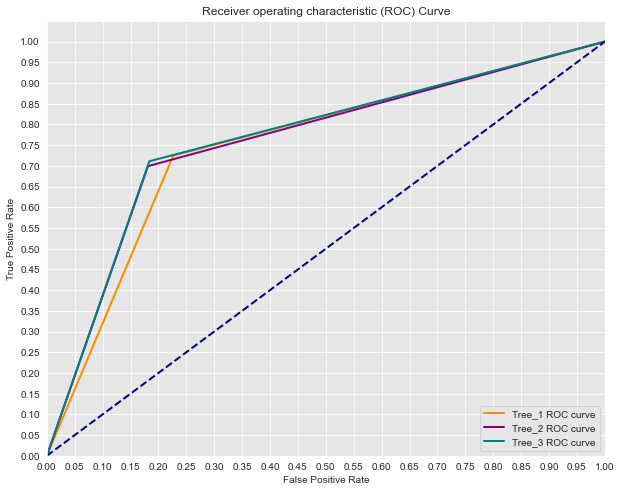

In [511]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_rate_a, true_positive_rate_a, color='darkorange',
         lw=lw, label='Tree_1 ROC curve')
plt.plot(false_positive_rate_b, true_positive_rate_b, color='purple',
         lw=lw, label='Tree_2 ROC curve')
plt.plot(false_positive_rate_c, true_positive_rate_c, color='teal',
         lw=lw, label='Tree_3 ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As the ROC curves show, our decision trees were not performing paticularly well in this dataset which is why our best model was a logistic regression. Even after various measures to tune them and preparing data differently, there wasn't much significant improvement in their performance

Their auc scores were however higher than 0.5 hence they are still better than randomly guessing. This can be seen in the diagram as the curves being above the straight dotted line

### Logistic Regression models

The logistic regression models consistently performed the best across all the modeling steps. In the second step where I imputed all missing values, the vanilla model performed best compared to tuned versions. 

There was a general improvement in the model performances as I took steps to prepare the dataset compared to simply dropping all null values. However these improvements did not exceed the performance of the first tuned model from the dropped values case which consistently remained the top model

Here is how they compare

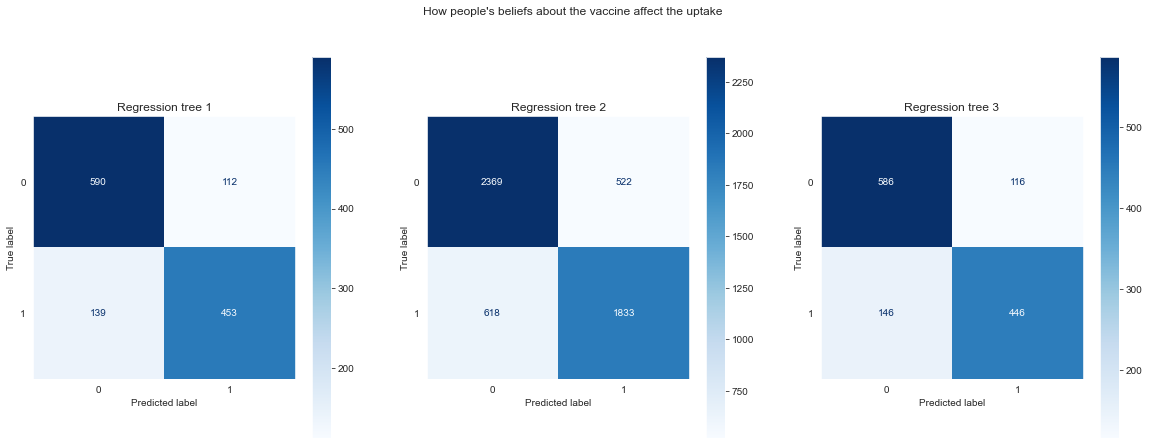

In [512]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# creating the matrices
cnf_matrix_a = confusion_matrix(y_test_a, y_pred_tuned)
cnf_matrix_b = confusion_matrix(y_test_b, vanilla_y_pred_b)
cnf_matrix_c = confusion_matrix(y_test_c, y_pred_tuned_c)

# visualizing them
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))
fig.suptitle('How people\'s beliefs about the vaccine affect the uptake')

disp_a = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix_a, display_labels= best_logr_a.classes_)
disp_a.plot(cmap=plt.cm.Blues, ax = axes[0])
axes[0].grid(False)
axes[0].set_title('Regression tree 1')

disp_b = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix_b, display_labels= vanilla_logr_b.classes_)
disp_b.plot(cmap=plt.cm.Blues, ax = axes[1])
axes[1].grid(False)
axes[1].set_title('Regression tree 2')

disp_c = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix_c, display_labels= best_logr.classes_)
disp_c.plot(cmap=plt.cm.Blues, ax = axes[2])
axes[2].grid(False)
axes[2].set_title('Regression tree 3');

Plotting our best model:

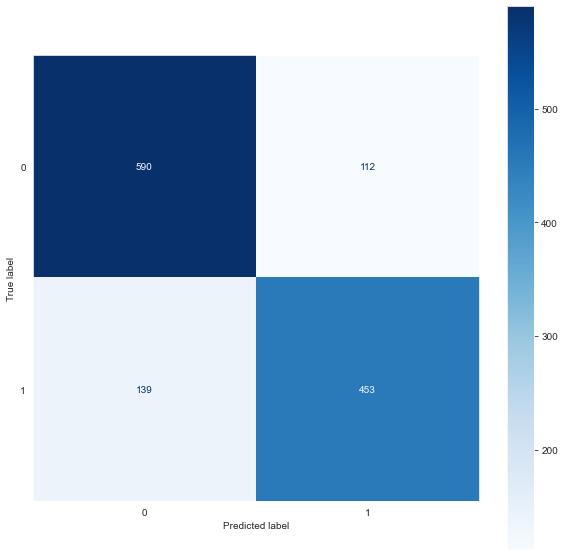

In [513]:
fig, ax = plt.subplots(figsize = (10, 10))

disp_a.plot(ax = ax, cmap=plt.cm.Blues)
ax.grid(False)

Our best model predicted 590 True Negatives and 453 vTrue Positives.
False positives are 112 and false negatives are 139

True negatives are the highest number which means our model is most effective in predicting if a person will not take a vaccine. This is what we are looking for so that KEMRI can know the people who do not get vaccinated so they can allocate more resources towards efforts to get them vaccinated.

A higher false negative number than false positive number also means our model is more likely to misclassify positive vaccination cases that negative ones. 

This is in line with the main goal of the project which is to identify the negative cases (those who are unlikely to vaccinate) effectively to aid in recommending vaccination drives towards these individuals